<a href="https://colab.research.google.com/github/GilangPutra14/tubes_PCVK/blob/main/tubes_pcvk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt



(<matplotlib.axes._subplots.AxesSubplot at 0x7f1a2c7036d0>,
 <matplotlib.image.AxesImage at 0x7f1a2c58f790>)

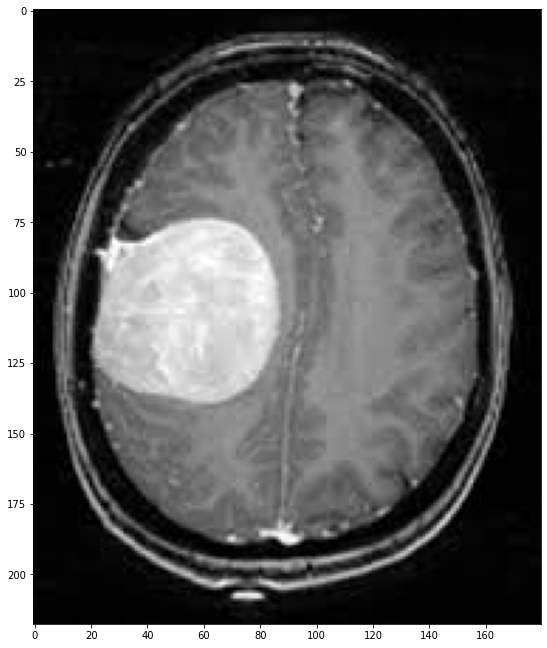

In [ ]:
filename = ('/content/drive/MyDrive/Brain_Tumor/BrainTumor/Y1.jpg')

img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

pixel_values = img.reshape((-1, 3))

pixel_values = np.float32(pixel_values)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)


# masih Menngunakan 3 cluster
k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)


#konversi titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)

plt.figure(figsize = (20,20))
plt.subplot(1,2,1),plt.imshow(img)


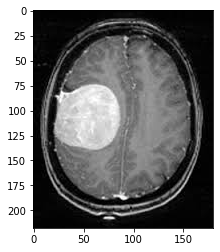

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread ('/content/drive/MyDrive/Brain_Tumor/BrainTumor/Y1.jpg')

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
plt.imshow(img_gray, cmap='gray')
plt.show()


   

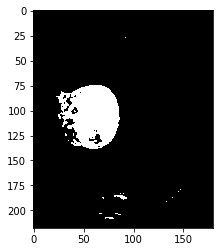

In [ ]:
ret, img_binary = cv2.threshold(img,200,255, cv2.THRESH_BINARY)
plt.imshow(img_binary)
plt.show()

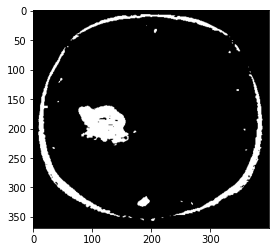

In [ ]:
img = cv.imread ('/content/drive/MyDrive/Brain_Tumor/BrainTumor/Y11.jpg')

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
plt.imshow(img_gray, cmap='gray')

ret, img_binary = cv2.threshold(img,200,255, cv2.THRESH_BINARY)
plt.imshow(img_binary)
plt.show()

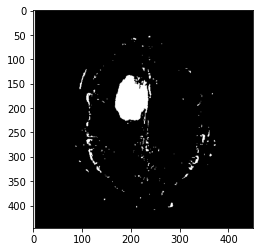

In [45]:
img = cv.imread ('/content/drive/MyDrive/Brain_Tumor/BrainTumor/Y35.jpg')

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
plt.imshow(img_gray, cmap='gray')

ret, img_binary = cv2.threshold(img,130,255, cv2.THRESH_BINARY)
plt.imshow(img_binary)
plt.show()

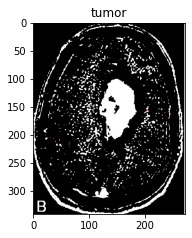

In [42]:
img = cv.imread ('/content/drive/MyDrive/Brain_Tumor/BrainTumor/Y192.JPG')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

plt.subplot(121),plt.imshow(img), plt.title('tumor')

ret, img_binary = cv2.threshold(img,100,255, cv2.THRESH_BINARY)
plt.imshow(img_binary)
plt.show()

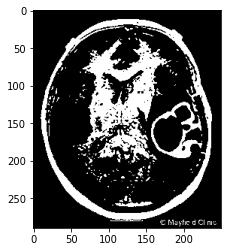

In [36]:
img = cv.imread ('/content/drive/MyDrive/Brain_Tumor/BrainTumor/Y73.jpg')

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(img_gray, cmap='gray')

ret, img_binary = cv2.threshold(img,150,255, cv2.THRESH_BINARY)
plt.imshow(img_binary)
plt.show()

In [1]:
import numpy as np
import cv2
import cv2 as cv
from matplotlib import pyplot as plt
from skimage.morphology import extrema
from skimage.morphology import watershed as skwater

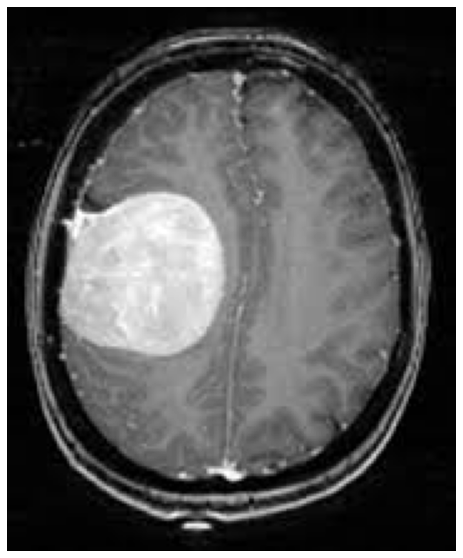

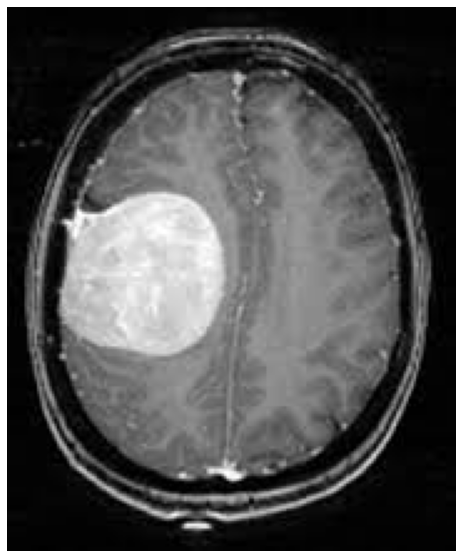

[[[3 3 3]
  [3 3 3]
  [3 3 3]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[3 3 3]
  [3 3 3]
  [3 3 3]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[3 3 3]
  [3 3 3]
  [3 3 3]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 ...

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [3 3 3]
  [3 3 3]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [1 1 1]
  [1 1 1]
  [2 2 2]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [1 1 1]
  [1 1 1]
  [2 2 2]]]


In [11]:
def Show(img,ctype):
  plt.figure(figsize=(10, 10))
  if ctype=='bgr':
    b,g,r = cv2.split(img)       # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    plt.imshow(rgb_img)
  elif ctype=='hsv':
    rgb = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    plt.imshow(rgb)
  elif ctype=='gray':
    plt.imshow(img,cmap='gray')
  elif ctype=='rgb':
    plt.imshow(img)
  else:
    raise Exception("Unknown colour type")
  plt.axis('off')
  plt.show()


img = cv2.imread ('/content/drive/MyDrive/Brain_Tumor/BrainTumor/Y1.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
Show (gray ,'gray')

ret, markers = cv2.connectedComponents(thresh)

marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0] 

largest_component = np.argmax(marker_area)+1

brain_mask = markers==largest_component

brain_out = img.copy()

brain_out[brain_mask==False] = (0,0,0)

img1 = cv2.imread ('/content/drive/MyDrive/Brain_Tumor/BrainTumor/Y1.jpg')
gray        = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

brain_mask = np.uint8(brain_mask)
kernel = np.ones((1,1),np.uint8)
closing = cv2.morphologyEx(brain_mask, cv2.MORPH_CLOSE, kernel)
Show(img1, 'gray')

brain_out = img.copy()
print(img.copy())

brain_out[closing==False] = (0,0,0)

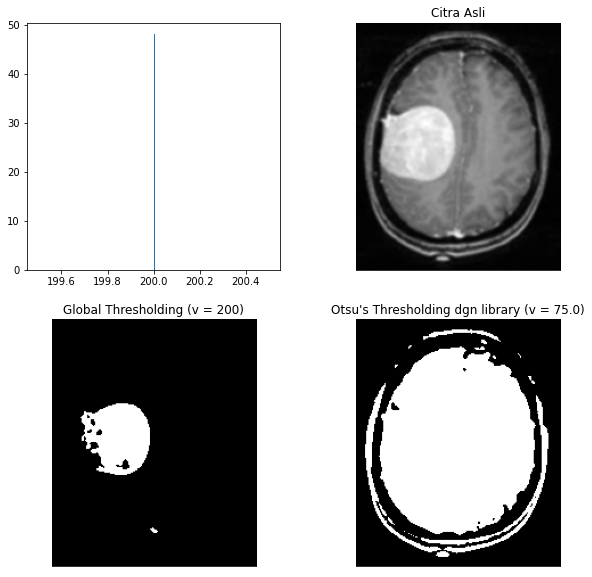

In [26]:
filename = ('/content/drive/MyDrive/Brain_Tumor/BrainTumor/Y1.jpg')
img = cv.imread(filename,0)
thresh = 200
blur = cv.GaussianBlur(img,(5,5),0)

ret,th1 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 200)', x]
citra3 = [blur, th1, th2]

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[200,200])
for i in range(len(citra3)):
 plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

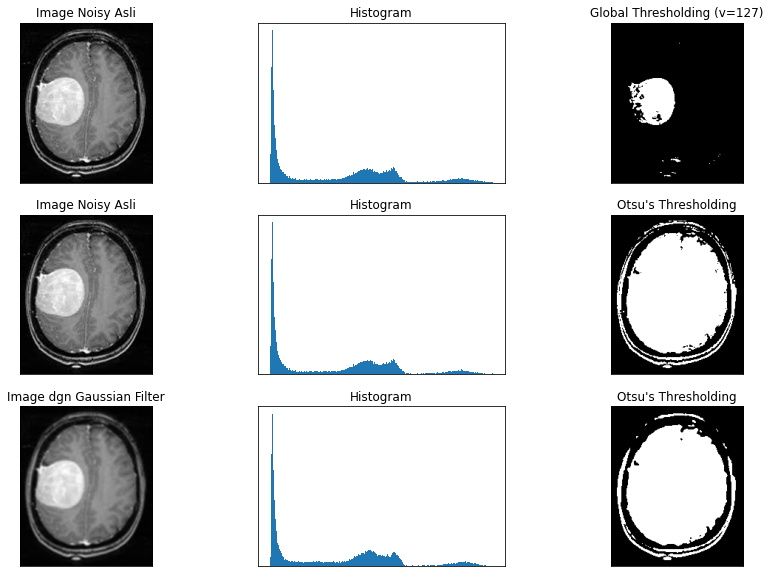

In [28]:
filename = ('/content/drive/MyDrive/Brain_Tumor/BrainTumor/Y1.jpg')
img = cv.imread(filename,0)
#Global Thresholding
ret1,th1 = cv.threshold(img,200,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,100,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding setelah dilakukan Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
#plotting semua image
images = [img, 0, th1,
 img, 0, th2,
 blur, 0, th3]
titles = ['Image Noisy Asli','Histogram','Global Thresholding (v=127)',
 'Image Noisy Asli','Histogram',"Otsu's Thresholding",
 'Image dgn Gaussian Filter','Histogram',"Otsu's Thresholding"]
plt.figure(figsize = (15,10))
for i in range(3):
 plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
 plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
 plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
 plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
 plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
 plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()